# Project: Wrangling and Analyze Data

In [126]:
import pandas as pd
import requests
import tweepy
from tweepy import OAuthHandler
import time
from timeit import default_timer as timer
import json
import os
import csv
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [11]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions  = pd.read_table('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [31]:
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [32]:
error_list = []
df_list = []
start = time.time()

for tweet_id in twitter_archive['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode='extended',
                               wait_on_rate_limit = True, wait_on_rate_limit_notify = True)._json 
        favorites = tweet['favorite_count'] # to see how many favorite the tweets had
        retweets = tweet['retweet_count'] # for counting the retweets
        user_followers = tweet['user']['followers_count'] # to see how many followers the user had
        user_favourites = tweet['user']['favourites_count'] # to see how many favorites the user had
        date_time = tweet['created_at'] # to see the datetime of tweet
        
        df_list.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)
end = time.time()
print(end - start)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 _ [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 _ [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 _ [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
851953902622658560 _ [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 _ [{'co

KeyboardInterrupt: 

In [33]:
json_tweets = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [34]:
tweet_data = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_data

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,34151,7083,9165464,146771,2017-08-01 16:23:56
1,892177421306343426,29627,5344,9165464,146771,2017-08-01 00:17:27
2,891815181378084864,22308,3515,9165464,146771,2017-07-31 00:18:03
3,891689557279858688,37336,7286,9165463,146771,2017-07-30 15:58:51
4,891327558926688256,35665,7823,9165463,146771,2017-07-29 16:00:24
5,891087950875897856,17997,2632,9165463,146771,2017-07-29 00:08:17
6,890971913173991426,10473,1685,9165463,146771,2017-07-28 16:27:12
7,890729181411237888,57418,15919,9165463,146771,2017-07-28 00:22:40
8,890609185150312448,24779,3657,9165463,146771,2017-07-27 16:25:51
9,890240255349198849,28260,6155,9165463,146771,2017-07-26 15:59:51


## Assessing Data

In [35]:
twitter_archive.info()
twitter_archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [37]:
image_predictions.info()
image_predictions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [38]:
tweet_data.info()
tweet_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873 entries, 0 to 872
Data columns (total 6 columns):
tweet_id           873 non-null int64
favorites          873 non-null int64
retweets           873 non-null int64
user_followers     873 non-null int64
user_favourites    873 non-null int64
date_time          873 non-null object
dtypes: int64(5), object(1)
memory usage: 41.0+ KB


,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,34151,7083,9165464,146771,2017-08-01 16:23:56
1,892177421306343426,29627,5344,9165464,146771,2017-08-01 00:17:27
2,891815181378084864,22308,3515,9165464,146771,2017-07-31 00:18:03
3,891689557279858688,37336,7286,9165463,146771,2017-07-30 15:58:51
4,891327558926688256,35665,7823,9165463,146771,2017-07-29 16:00:24


### Quality issues
1. retweeted_status_timestamp, timestamp should be datetime instead of object (string). (twitter_archive)

2. tweet_id should be object(string) (twitter_archive)

3. We only want original ratings "no retweets" those ones have image. (twitter_archive)

4. Change p1 to Prediction1 and other columns that is related to the prediction such as (p1_conf, p1_dog etc...) to (Prediction_conf etc..)

5. Change p2 to Prediction2 and other columns that is related to the prediction such as (p2_conf, p2_dog etc...) to (Prediction_conf etc..)

6. Change p3 to Prediction3 and other columns that is related to the prediction such as (p3_conf, p3_dog etc...) to (Prediction_conf etc..)

7. Rating data can't be compare since the demoninator are not the same.

8. Change tweet_id to an object datatype

### Tidiness issues
1. the dog stage has 4 stages

2. Combine the datasets together.

## Cleaning Data

In [80]:
# Make copies of original pieces of data
twitter_archive_cleaned = twitter_archive.copy()
image_predictions_cleaned = image_predictions.copy()
tweet_data_cleaned = tweet_data.copy()

### Issue: We only want original ratings "no retweets" those ones have image

#### Define: clean the retweets of the df

#### Code

In [81]:
twitter_archive_cleaned = twitter_archive_cleaned[pd.isnull(twitter_archive_cleaned.retweeted_status_id)]
twitter_archive_cleaned = twitter_archive_cleaned.drop('retweeted_status_id', 1)
twitter_archive_cleaned = twitter_archive_cleaned.drop('retweeted_status_user_id', 1)
twitter_archive_cleaned = twitter_archive_cleaned.drop('retweeted_status_timestamp', 1)

#### Test

In [82]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Issue Datatypes:

#### Define: retweeted_status_timestamp, timestamp should be datetime instead of object (string) and tweet_id should be object(string)

#### Code

In [83]:
twitter_archive_cleaned['retweeted_status_timestamp'] = pd.to_datetime(twitter_archive_cleaned.timestamp)
twitter_archive_cleaned['timestamp'] = pd.to_datetime(twitter_archive_cleaned.timestamp)
twitter_archive_cleaned['tweet_id'] = twitter_archive_cleaned['tweet_id'].astype('str')

#### Test

In [84]:
twitter_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
retweeted_status_timestamp    2175 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(9)
memory usage: 271.9+ KB


### Issue Columns Names:

#### Define: Change p1 to Prediction1 and the same to other columns.

#### Code

In [85]:
image_predictions_cleaned.rename(columns={'p1': 'Prediction1', 'p2': 'Prediction2', 'p3': 'Prediction3'}, inplace=True)
image_predictions_cleaned.rename(columns={'p1_conf': 'Prediction1_conf', 'p1_dog': 'Prediction1_dog'}, inplace=True)
image_predictions_cleaned.rename(columns={'p2_conf': 'Prediction2_conf', 'p2_dog': 'Prediction2_dog'}, inplace=True)
image_predictions_cleaned.rename(columns={'p3_conf': 'Prediction3_conf', 'p3_dog': 'Prediction3_dog'}, inplace=True)

#### Test

In [86]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
img_num             2075 non-null int64
Prediction1         2075 non-null object
Prediction1_conf    2075 non-null float64
Prediction1_dog     2075 non-null bool
Prediction2         2075 non-null object
Prediction2_conf    2075 non-null float64
Prediction2_dog     2075 non-null bool
Prediction3         2075 non-null object
Prediction3_conf    2075 non-null float64
Prediction3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue Datatype on image_predictions df:

#### Define: Change tweet_id to an object datatype

#### Code

In [87]:
image_predictions_cleaned['tweet_id'] = image_predictions_cleaned['tweet_id'].astype('str')
tweet_data_cleaned['tweet_id'] = tweet_data_cleaned['tweet_id'].astype('str')

#### Test

In [88]:
image_predictions_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id            2075 non-null object
jpg_url             2075 non-null object
img_num             2075 non-null int64
Prediction1         2075 non-null object
Prediction1_conf    2075 non-null float64
Prediction1_dog     2075 non-null bool
Prediction2         2075 non-null object
Prediction2_conf    2075 non-null float64
Prediction2_dog     2075 non-null bool
Prediction3         2075 non-null object
Prediction3_conf    2075 non-null float64
Prediction3_dog     2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue Datatype on image_predictions df:

#### Define: Change tweet_id to an object datatype


#### Code


In [89]:
twitter_archive_cleaned['rating'] = twitter_archive_cleaned['rating_numerator'] / twitter_archive_cleaned['rating_denominator']

#### Teste


In [90]:
twitter_archive_cleaned.sample(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweeted_status_timestamp,rating
920,756303284449767430,NaN,NaN,2016-07-22 01:42:09,"<a href=""http://twitter.com/download/iphone"" r...",Pwease accept dis rose on behalf of dog. 11/10...,https://twitter.com/dog_rates/status/756303284...,11,10,None,None,None,None,None,2016-07-22 01:42:09,1.100000
1786,677573743309385728,NaN,NaN,2015-12-17 19:39:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Sandy. He's sexually confused. Thinks ...,https://twitter.com/dog_rates/status/677573743...,10,10,Sandy,None,None,None,None,2015-12-17 19:39:03,1.000000
187,856282028240666624,NaN,NaN,2017-04-23 23:01:59,"<a href=""http://twitter.com/download/iphone"" r...","This is Cermet, Paesh, and Morple. They are ab...",https://twitter.com/dog_rates/status/856282028...,14,10,Cermet,None,None,None,None,2017-04-23 23:01:59,1.400000
1847,675820929667219457,NaN,NaN,2015-12-12 23:34:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a handful of sleepy puppers. All look u...,https://twitter.com/dog_rates/status/675820929...,11,10,None,None,None,None,None,2015-12-12 23:34:00,1.100000
1334,705428427625635840,NaN,NaN,2016-03-03 16:23:38,"<a href=""http://twitter.com/download/iphone"" r...",This is Ambrose. He's an Alfalfa Ballyhoo. Dra...,https://twitter.com/dog_rates/status/705428427...,11,10,Ambrose,None,None,pupper,None,2016-03-03 16:23:38,1.100000
1825,676470639084101634,NaN,NaN,2015-12-14 18:35:43,"<a href=""http://twitter.com/download/iphone"" r...",Three generations of pupper. 11/10 for all htt...,https://twitter.com/dog_rates/status/676470639...,11,10,None,None,None,pupper,None,2015-12-14 18:35:43,1.100000
1223,714251586676113411,NaN,NaN,2016-03-28 00:43:43,"<a href=""http://twitter.com/download/iphone"" r...",This is Thumas. He hates potted plants. 8/10 w...,https://twitter.com/dog_rates/status/714251586...,8,10,Thumas,None,None,None,None,2016-03-28 00:43:43,0.800000
1126,729854734790754305,NaN,NaN,2016-05-10 02:05:03,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Ollie. He conducts this train. He...,https://twitter.com/dog_rates/status/729854734...,11,10,Ollie,None,None,None,None,2016-05-10 02:05:03,1.100000
1626,684800227459624960,NaN,NaN,2016-01-06 18:14:31,"<a href=""http://twitter.com/download/iphone"" r...",Meet Theodore. He's dapper as hell. Probably o...,https://twitter.com/dog_rates/status/684800227...,11,10,Theodore,None,None,None,None,2016-01-06 18:14:31,1.100000
2192,668932921458302977,NaN,NaN,2015-11-23 23:23:31,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He likes to swing. Subtle tong...,https://twitter.com/dog_rates/status/668932921...,9,10,Herald,None,None,None,None,2015-11-23 23:23:31,0.900000


### Tidiness Datatype on image_predictions df:

#### Define: the dog stage has 4 stages.



#### Code

In [91]:
Stages = ['doggo', 'pupper','floofer', 'puppo']
Columns = [i for i in twitter_archive_cleaned.columns.tolist() if i not in Stages]


twitter_archive_cleaned = pd.melt(twitter_archive_cleaned, id_vars = Columns, value_vars = Stages, 
                         var_name = 'stages', value_name = 'dog_stage')
# Delete column 'stages'
twitter_archive_cleaned = twitter_archive_cleaned.drop('stages', 1)

#### Test

In [92]:
twitter_archive_cleaned.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweeted_status_timestamp,rating,dog_stage
6734,846139713627017216,NaN,NaN,2017-03-26 23:20:02,"<a href=""http://twitter.com/download/iphone"" r...",SHE DID AN ICY ZOOM AND KNEW WHEN TO PUT ON TH...,https://twitter.com/csncapitals/status/8460884...,13,10,None,2017-03-26 23:20:02,1.3,None
7063,790277117346975746,NaN,NaN,2016-10-23 19:42:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruce. He never backs down from a chal...,https://twitter.com/dog_rates/status/790277117...,11,10,Bruce,2016-10-23 19:42:02,1.1,None
4177,668994913074286592,NaN,NaN,2015-11-24 03:29:51,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous pups here. Both have cute fake ho...,https://twitter.com/dog_rates/status/668994913...,5,10,None,2015-11-24 03:29:51,0.5,None
5481,707038192327901184,NaN,NaN,2016-03-08 03:00:15,"<a href=""http://twitter.com/download/iphone"" r...",This is Kathmandu. He sees every move you make...,https://twitter.com/dog_rates/status/707038192...,10,10,Kathmandu,2016-03-08 03:00:15,1.0,None
3690,681281657291280384,NaN,NaN,2015-12-28 01:12:59,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sarge. His parents signed him up for danc...,https://twitter.com/dog_rates/status/681281657...,11,10,Sarge,2015-12-28 01:12:59,1.1,None
2197,887473957103951883,NaN,NaN,2017-07-19 00:47:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,2017-07-19 00:47:34,1.3,None
1361,689659372465688576,NaN,NaN,2016-01-20 04:03:02,"<a href=""http://twitter.com/download/iphone"" r...",This is Ricky. He's being escorted out of the ...,https://twitter.com/dog_rates/status/689659372...,8,10,Ricky,2016-01-20 04:03:02,0.8,None
7162,773985732834758656,NaN,NaN,2016-09-08 20:45:53,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winnie. She just made awkward eye contact...,https://twitter.com/dog_rates/status/773985732...,11,10,Winnie,2016-09-08 20:45:53,1.1,None
5241,740365076218183684,NaN,NaN,2016-06-08 02:09:24,"<a href=""http://twitter.com/download/iphone"" r...",When the photographer forgets to tell you wher...,https://twitter.com/dog_rates/status/740365076...,10,10,None,2016-06-08 02:09:24,1.0,None
1150,705898680587526145,NaN,NaN,2016-03-04 23:32:15,"<a href=""http://twitter.com/download/iphone"" r...",Meet Max. He's a Fallopian Cephalopuff. Eyes a...,https://twitter.com/dog_rates/status/705898680...,10,10,Max,2016-03-04 23:32:15,1.0,None


### Tidiness Combine datasets:

#### Define:Combine the datasets together.

#### Code

In [93]:
twitter_data = pd.merge(left=twitter_archive_cleaned,
                                 right=tweet_data_cleaned, left_on='tweet_id', right_on='tweet_id', how='inner')

#### Test

In [94]:
twitter_data = twitter_data.merge(image_predictions_cleaned, on='tweet_id', how='inner')
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2616 entries, 0 to 2615
Data columns (total 29 columns):
tweet_id                      2616 non-null object
in_reply_to_status_id         16 non-null float64
in_reply_to_user_id           16 non-null float64
timestamp                     2616 non-null datetime64[ns]
source                        2616 non-null object
text                          2616 non-null object
expanded_urls                 2616 non-null object
rating_numerator              2616 non-null int64
rating_denominator            2616 non-null int64
name                          2616 non-null object
retweeted_status_timestamp    2616 non-null datetime64[ns]
rating                        2616 non-null float64
dog_stage                     2616 non-null object
favorites                     2616 non-null int64
retweets                      2616 non-null int64
user_followers                2616 non-null int64
user_favourites               2616 non-null int64
date_time        

## Storing Data

In [95]:
twitter_data.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data

In [102]:
df = pd.read_csv('twitter_archive_master.csv')
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 29 columns):
tweet_id                      2616 non-null int64
in_reply_to_status_id         16 non-null float64
in_reply_to_user_id           16 non-null float64
timestamp                     2616 non-null object
source                        2616 non-null object
text                          2616 non-null object
expanded_urls                 2616 non-null object
rating_numerator              2616 non-null int64
rating_denominator            2616 non-null int64
name                          2616 non-null object
retweeted_status_timestamp    2616 non-null object
rating                        2616 non-null float64
dog_stage                     2616 non-null object
favorites                     2616 non-null int64
retweets                      2616 non-null int64
user_followers                2616 non-null int64
user_favourites               2616 non-null int64
date_time                     2616

In [97]:
df['Prediction1'].value_counts()

golden_retriever             260
Pembroke                     144
Labrador_retriever           136
Chihuahua                     84
chow                          80
Samoyed                       64
French_bulldog                56
cocker_spaniel                56
malamute                      52
Cardigan                      44
German_shepherd               44
Pomeranian                    36
miniature_pinscher            32
web_site                      32
Chesapeake_Bay_retriever      32
Staffordshire_bullterrier     32
Eskimo_dog                    32
Siberian_husky                32
basset                        32
pug                           32
seat_belt                     28
Doberman                      24
vizsla                        24
Norwegian_elkhound            24
Old_English_sheepdog          24
teddy                         24
beagle                        20
kelpie                        20
Shetland_sheepdog             20
Bernese_mountain_dog          20
          

Text(0.5,1,'scatter plot of retweets and scatter plot')

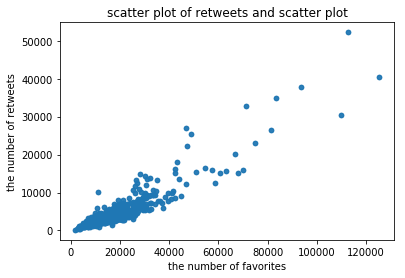

In [98]:
df.plot(kind='scatter',x='favorites',y='retweets', alpha = 0.5)
plt.xlabel('the number of favorites')
plt.ylabel('the number of retweets')
plt.title('scatter plot of retweets and scatter plot')

In [100]:
df['rating'].value_counts()

1.200000    976
1.300000    816
1.100000    492
1.000000    148
1.400000    128
0.700000      8
0.800000      8
0.500000      8
0.900000      4
2.700000      4
0.300000      4
3.428571      4
0.600000      4
0.400000      4
7.500000      4
0.000000      4
Name: rating, dtype: int64

In [101]:
df.name.value_counts()


None         464
Charlie       24
Penny         20
Tucker        20
Bo            16
Stanley       16
Daisy         16
Cooper        16
Winston       16
Jeffrey       12
Waffles       12
Bailey        12
Boomer        12
Oakley        12
Leo           12
Lucy          12
Dave          12
Zeke          12
Finn          12
Koda          12
Winnie        12
Bear          12
Toby          12
Loki          12
Clark         12
Jack          12
Scout         12
Rusty         12
Oliver        12
a             12
            ... 
Burt           4
Ava            4
Jay            4
Coco           4
Hercules       4
Hunter         4
Tom            4
Lassie         4
Jackson        4
Jax            4
Frankie        4
Davey          4
Lily           4
Sunshine       4
Kona           4
Sansa          4
Dobby          4
Laika          4
Malcolm        4
Dash           4
Rocco          4
Alexander      4
Margo          4
Rontu          4
Duddles        4
Strider        4
Jimison        4
Roosevelt     

### Insights:
1. Golden Retriver are the most popular dog on our data set

2. There are a corelaction between the favorites and retweet actions

3. The rate 1.2 are the most frequent been seen 976 times on our data set. 

4. The name Charlie repeat 24 times been the most repeated name followed by Penny and Tucker with 20 times . 

### Visualization

In [130]:
import seaborn as sns
% matplotlib inline

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


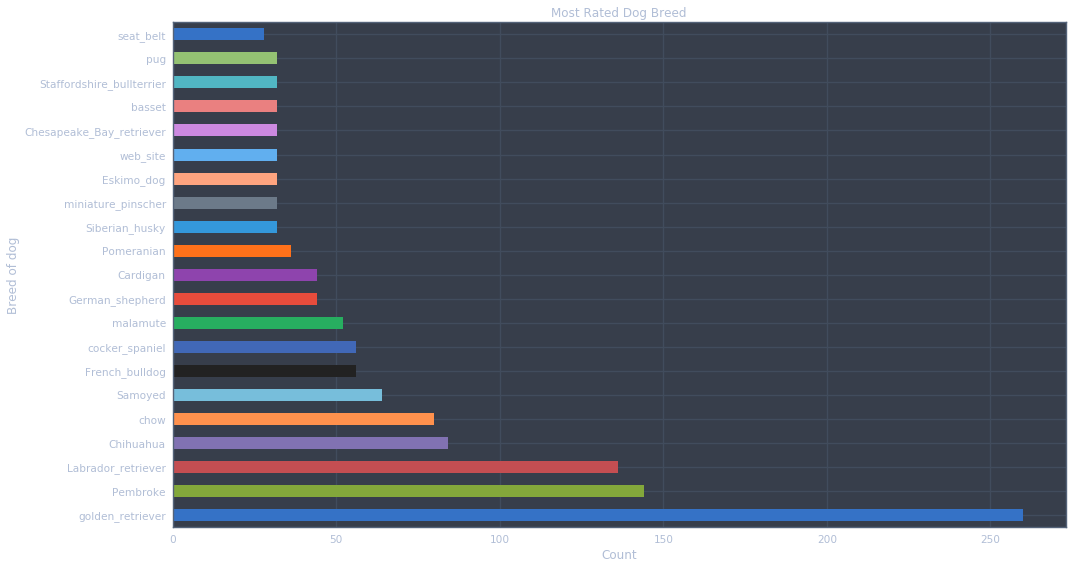

In [147]:
dog_breed = df.groupby('Prediction1').filter(lambda x: len(x) >= 25)
dog_breed['Prediction1'].value_counts().plot(kind = 'barh', figsize=(15,8))
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

/opt/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


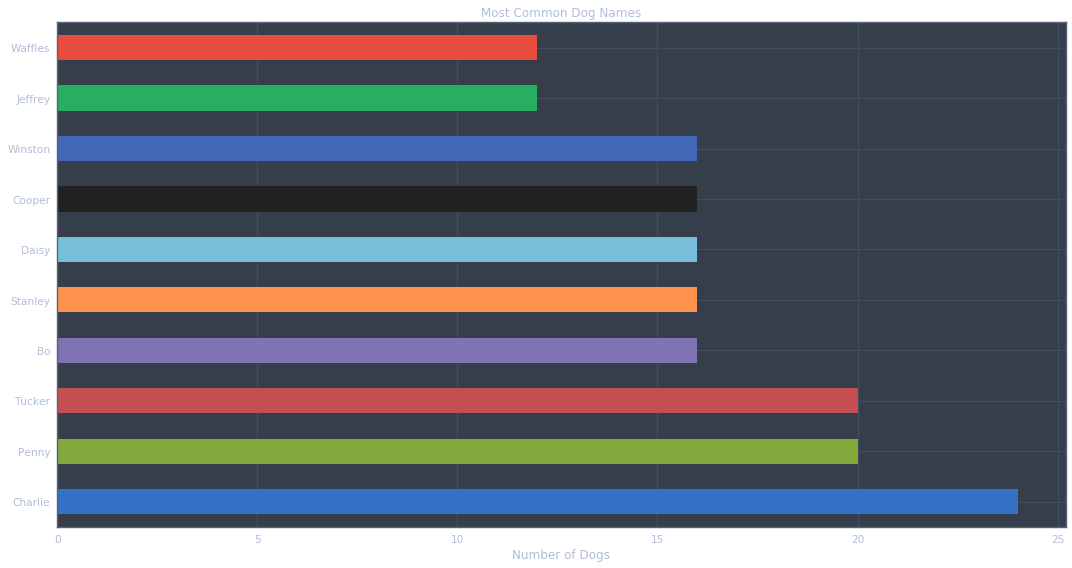

In [144]:
df.name.value_counts()[1:11].plot('barh', figsize=(15,8), title='Most Common Dog Names').set_xlabel("Number of Dogs");
